# import libraries

In [35]:
import pandas as pd
import tensorflow as tf
import keras
from keras import Sequential
import keras.layers as layers
import keras.backend as K
import warnings
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# import dataset

In [2]:
X_train = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/X_train.csv')
X_val = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/X_val.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/X_test.csv')

y_train = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/y_train.csv')
y_val = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/y_val.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/y_test.csv')

In [3]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,1.108288,0.334538,-0.928804,0.568671,0.833502,-0.657141,0.506799,-0.564233,0.771240,-0.362660
1,-0.682776,0.791829,-0.753517,-1.284149,0.895069,-0.795165,0.878750,-0.792463,-0.938867,0.682620
2,-0.380328,0.984271,-0.313804,0.853838,0.550795,-0.904042,0.958895,0.523307,-0.846885,-0.077131
3,-0.682534,0.662424,1.182869,-0.746355,0.846742,1.481897,0.173655,0.840533,-0.489766,-0.656951
4,-1.459707,1.753709,-3.044087,1.822702,-3.255496,-1.468134,-3.010396,1.930334,-1.587531,-2.640146


In [4]:
X_val.shape

(28481, 10)

In [5]:
X_test.shape

(28481, 10)

> as we agree that the val and test is 10%

# base model

> for the base model the architecture will be (𝒏, 𝟐 × 𝒏, 𝟐 × 𝒏, 𝒏𝒖𝒎_𝒄𝒍𝒂𝒔𝒔) where n is input layer which means how many features there are which is 10 and num_class which is 2

In [6]:
n = len(X_train.columns)
num_class = len(y_train.target.unique()) - 1

In [7]:
keras.backend.clear_session()
base_model = Sequential()
base_model.add(layers.Dense(2 * n, input_shape = (n,)))
base_model.add(layers.Activation('relu'))
base_model.add(layers.Dense(2 * n))
base_model.add(layers.Activation('relu'))
base_model.add(layers.Dense(num_class))
base_model.add(layers.Activation('sigmoid'))

> as we are going to use binary cross entropy the class will be only 1 with probability of 0 to 1

In [8]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 661
Trainable params: 661
Non-trainable pa

> from the first dense we can see that the input will be 10 and the dense layer will be 20 as it suggest in the question but it will add 20 for its bias and also the next and next one

> now we are going to compile the model the loss will be binary crossentropy for the epoch will be 5 and the optimizer will be Adam as it is one of the fastest and more accurate and the metrics will be accuracy and f1 score

In [9]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [10]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
metrics = [get_f1, 'accuracy']

In [11]:
base_model.compile(loss = loss, optimizer = optimizer, metrics=metrics)

In [12]:
base_hist = base_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/5
7733/7733 [==============================] - 41s 5ms/step - loss: 0.3961 - get_f1: 0.0502 - accuracy: 0.9129 - val_loss: 0.1567 - val_get_f1: 0.0123 - val_accuracy: 0.9979
Epoch 2/5
7733/7733 [==============================] - 28s 4ms/step - loss: 0.1526 - get_f1: 0.5564 - accuracy: 0.9592 - val_loss: 0.0534 - val_get_f1: 0.0359 - val_accuracy: 0.9952
Epoch 3/5
7733/7733 [==============================] - 29s 4ms/step - loss: 0.0937 - get_f1: 0.7382 - accuracy: 0.9759 - val_loss: 0.0338 - val_get_f1: 0.0382 - val_accuracy: 0.9958
Epoch 4/5
7733/7733 [==============================] - 29s 4ms/step - loss: 0.0789 - get_f1: 0.7689 - accuracy: 0.9793 - val_loss: 0.0282 - val_get_f1: 0.0385 - val_accuracy: 0.9959
Epoch 5/5
7733/7733 [==============================] - 29s 4ms/step - loss: 0.0725 - get_f1: 0.7725 - accuracy: 0.9804 - val_loss: 0.0256 - val_get_f1: 0.0404 - val_accuracy: 0.9957


> because of the data that was given we cannot do a lot as the data is very much imbalanced it can have a really got accuracy but a bad f1 score

# modelling

> for this one im going to make a DNN.

> to deal with vanishing gradient im going to use elu as activation and using batch norm with he kernel

In [13]:
model = Sequential()
model.add(keras.Input(shape=(n,)))
for _ in range(10):
  model.add(layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
  model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss=loss, optimizer=optimizer, metrics = metrics)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               3300      
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_2 (Batc  (None, 300)             

In [15]:
model_hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/5
7733/7733 [==============================] - 90s 11ms/step - loss: 0.1596 - get_f1: 0.7992 - accuracy: 0.9629 - val_loss: 0.0419 - val_get_f1: 0.0412 - val_accuracy: 0.9968
Epoch 2/5
7733/7733 [==============================] - 85s 11ms/step - loss: 0.0662 - get_f1: 0.8529 - accuracy: 0.9865 - val_loss: 0.0311 - val_get_f1: 0.0417 - val_accuracy: 0.9961
Epoch 3/5
7733/7733 [==============================] - 85s 11ms/step - loss: 0.0421 - get_f1: 0.8595 - accuracy: 0.9892 - val_loss: 0.0232 - val_get_f1: 0.0417 - val_accuracy: 0.9959
Epoch 4/5
7733/7733 [==============================] - 83s 11ms/step - loss: 0.0329 - get_f1: 0.8618 - accuracy: 0.9904 - val_loss: 0.0201 - val_get_f1: 0.0413 - val_accuracy: 0.9953
Epoch 5/5
7733/7733 [==============================] - 87s 11ms/step - loss: 0.0281 - get_f1: 0.8675 - accuracy: 0.9912 - val_loss: 0.0171 - val_get_f1: 0.0424 - val_accuracy: 0.9956


> even if the accuracy isnt really improve that much we get an improvement a little bit in the f1 score.

# evaluation

In [32]:
y_pred = model.predict(X_test)
f = lambda x: 1 if x > 0.5 else 0
y_pred = np.array(list(map(f, y_pred)))

891/891 [==============================] - 3s 4ms/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.84      0.39        49

    accuracy                           1.00     28481
   macro avg       0.63      0.92      0.70     28481
weighted avg       1.00      1.00      1.00     28481



> the recall of the model is very goog but the f1-score isn't really that great

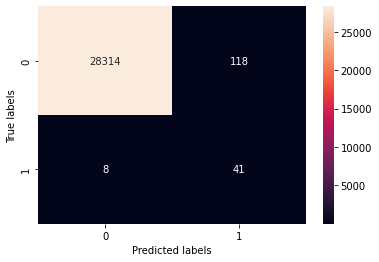

In [37]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
plt.show()

> it only missed 8 and predict it to 0 but it predict a lot of 0 as 1.

# Conclusion

> the data is very much difficult to handle as the imbalance is over the top even if we have a really good accuracy we will have a bad f1-score my model have a 40% of f1-score which is not really that bad

> my model is better than the baseline because my model is categorize as DNN which can perform much better than a MLP. we can also see that the f1-score of the model also improve about the accuracy we cannot say anything as if the model just predict all to be 0 than the accuracy will also be high as the data that was given is very imbalance and need a lot of preprocessing